### **Exploración y preprocesamiento de datos**

Datos iniciales:
   Gender  Hemoglobin   MCH  MCHC   MCV  Result
0       1        14.9  22.7  29.1  83.7       0
1       0        15.9  25.4  28.3  72.0       0
2       0         9.0  21.5  29.6  71.2       1
3       0        14.9  16.0  31.4  87.5       0
4       1        14.7  22.0  28.2  99.5       0

Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB
None

Valores únicos por columna:
Gender          2
Hemoglobin     81
MCH           136
MCHC           48
MCV           262
Result          2
dtype: int64

Valores nu

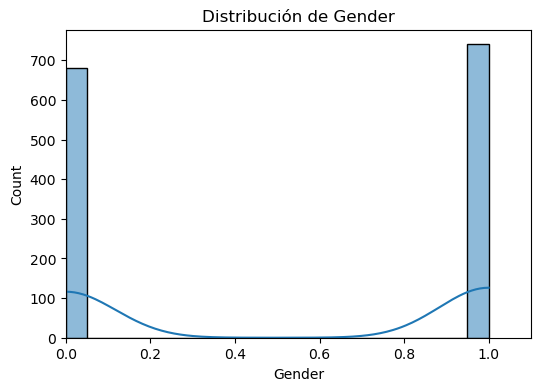

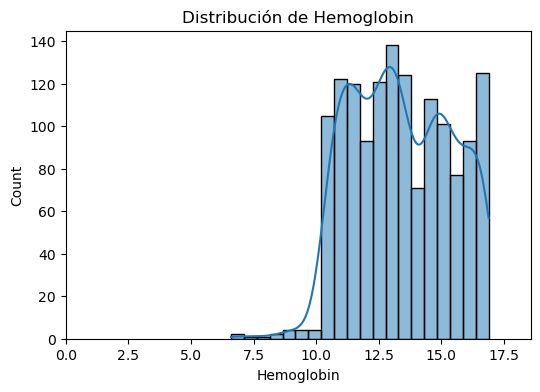

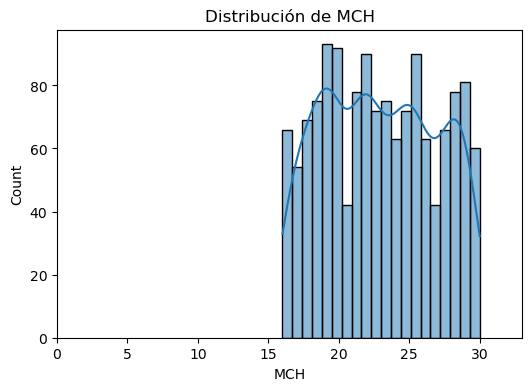

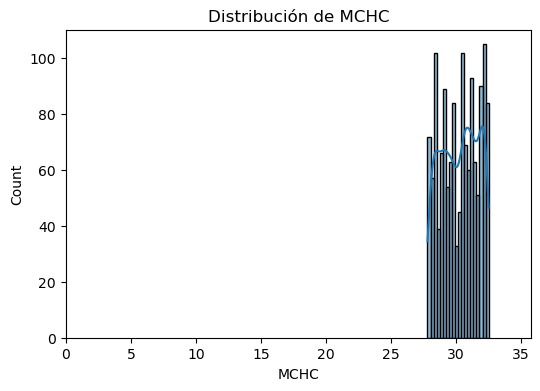

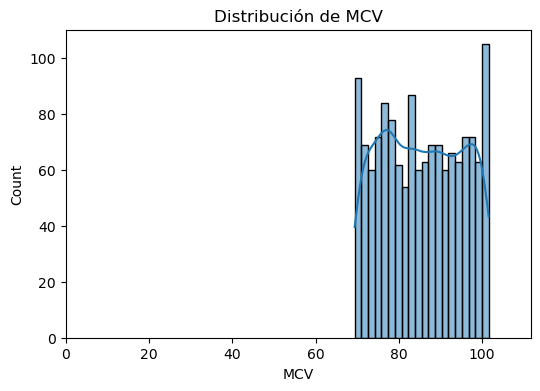

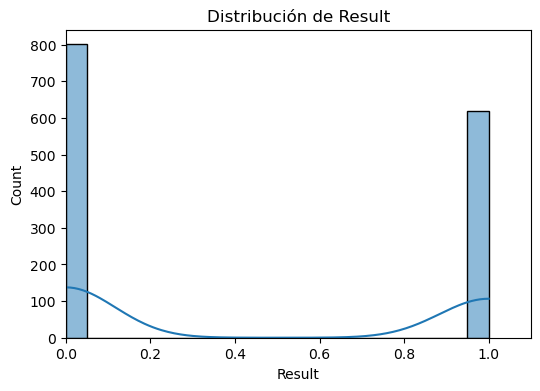

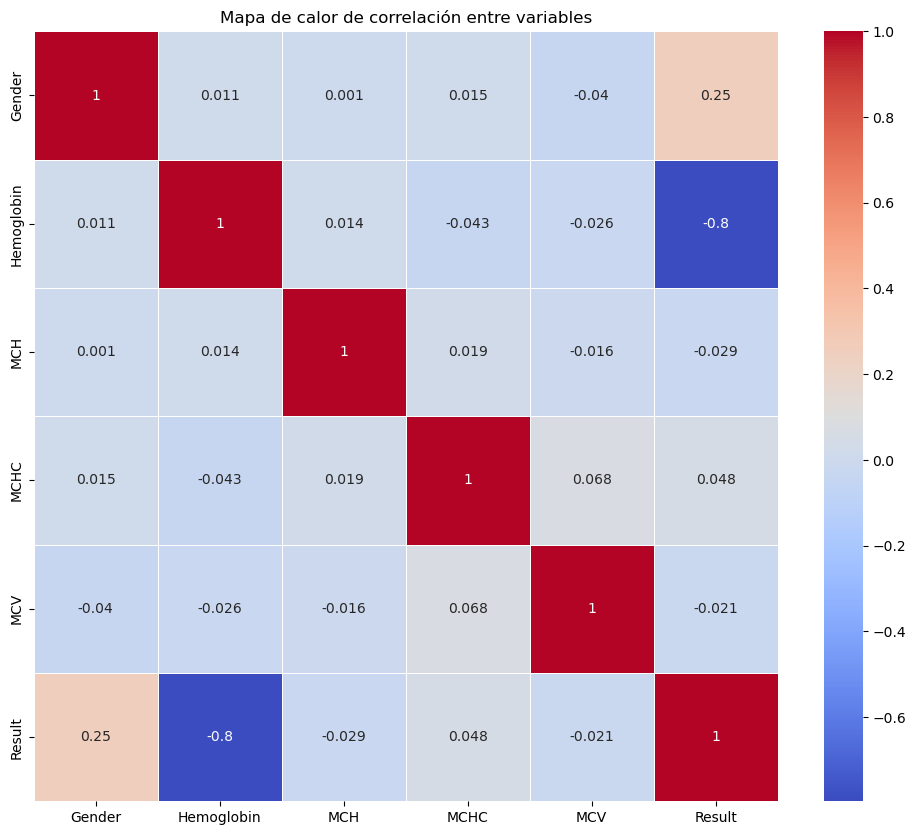

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# 1. Cargar el archivo CSV
pd.set_option('display.width', 1000)
dataframe = pd.read_csv('anemia.csv')
print("Datos iniciales:")
print(dataframe.head())  # Muestra los primeros registros para una vista rápida de cómo están estructurados los datos.

# 2. Exploración inicial del conjunto de datos
print("\nInformación general del conjunto de datos:")
print(dataframe.info())  # Muestra información general del conjunto de datos.

# Valores únicos por columna para identificar posibles problemas
print("\nValores únicos por columna:")
print(dataframe.nunique())  # Muestra la cantidad de valores únicos por columna.

# 3. Revisión y manejo de valores nulos
print("\nValores nulos por columna:")
print(dataframe.isnull().sum())  # Muestra la cantidad de valores nulos por columna.

# 4. Exploración detallada de características
print("\nVisualización de distribuciones individuales de las características:")
for column in dataframe.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataframe[column].dropna(), kde=True, bins=20)  # Un histograma con KDE para visualizar la forma de la distribución.
    plt.title(f'Distribución de {column}')
    plt.xlim(0, dataframe[column].max() * 1.1)  # Ajustar límites del eje X para ver mejor la distribución completa.
    plt.show()

# Mapa de calor de correlación entre variables
# Visualizamos la correlación entre las variables para detectar relaciones importantes entre las características.
plt.figure(figsize=(12, 10))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', linewidths=0.5)  # Se destaca con anotaciones el valor de la correlación.
plt.title('Mapa de calor de correlación entre variables')
plt.show()

### **Modelo y evaluación**